In [1]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df=pd.read_csv("banking.csv", header=0)

## Cleaning Dataframe and Manipulating

In [4]:
#df.drop(['duration','contact','month','day_of_week','default'],axis=1,inplace=True)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [6]:
df.rename(columns={'y':'willRespond'},inplace=True)

In [7]:
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True) #Removing unnecessary columns

In [8]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,willRespond
0,44,blue-collar,married,basic.4y,yes,no,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,3,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,1,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Preprocessing

In [10]:
le=preprocessing.LabelEncoder()

In [11]:
le.fit(df.poutcome)

LabelEncoder()

In [12]:
list(le.classes_)

['failure', 'nonexistent', 'success']

In [29]:
df.head(2)

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,willRespond
0,44,blue-collar,married,basic.4y,yes,no,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [30]:
df.poutcome=le.transform(df.poutcome)

In [31]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,willRespond
0,44,blue-collar,married,basic.4y,yes,no,1,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,3,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,2,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,1,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [32]:
df.housing=le.fit_transform(df.housing)

In [33]:
df.loan=le.fit_transform(df.loan)

In [34]:
df.head(2)

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,willRespond
0,44,blue-collar,married,basic.4y,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8,0


In [42]:
df.job=le.fit_transform(df.job)

In [43]:
df.marital=le.fit_transform(df.marital)

In [44]:
df.education=le.fit_transform(df.education)

In [45]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,willRespond
0,44,1,1,0,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,2,0,3,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,2,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,2,0,1,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [46]:
list(le.classes_)

['basic.4y',
 'basic.6y',
 'basic.9y',
 'high.school',
 'illiterate',
 'professional.course',
 'university.degree',
 'unknown']

# Plotting and Analyzing

(array([  1.66600000e+03,   1.13430000e+04,   1.20370000e+04,
          8.08700000e+03,   5.82300000e+03,   1.61300000e+03,
          3.18000000e+02,   2.02000000e+02,   8.90000000e+01,
          1.00000000e+01]),
 array([ 17. ,  25.1,  33.2,  41.3,  49.4,  57.5,  65.6,  73.7,  81.8,
         89.9,  98. ]),
 <a list of 10 Patch objects>)

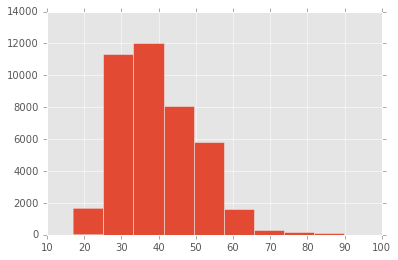

In [36]:
plt.hist(df.age)

In [38]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

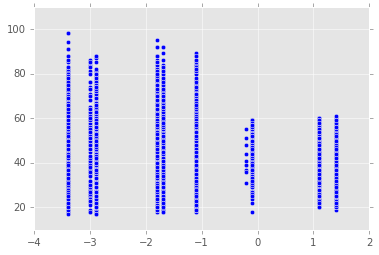

In [39]:
plt.scatter(df.emp_var_rate,df.age)

In [40]:
df.apply(lambda x: len(x.unique()))

age                78
job                12
marital             4
education           8
housing             3
loan                3
campaign           42
previous            8
poutcome            3
emp_var_rate       10
cons_price_idx     26
cons_conf_idx      26
euribor3m         316
nr_employed        11
willRespond         2
dtype: int64

# Splitting and Creating a Logistic Regression Model

In [47]:
df.shape, df['willRespond'].shape

((41188, 15), (41188L,))

In [48]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(df, df.willRespond, test_size=0.3, random_state=0) #70/30

In [50]:
x_train.shape, y_train.shape

((28831, 15), (28831L,))

In [51]:
x_test.shape, y_test.shape

((12357, 15), (12357L,))

## Model

In [52]:
model=LogisticRegression(penalty='l2', max_iter=1000)

In [53]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
prediction=model.predict(x_test)

## Score and Metrics

In [55]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
model.score(x_test,y_test)

1.0

In [57]:
np.mean(prediction==y_test)

1.0

In [58]:
score=cross_validation.cross_val_score(model,df,df.willRespond,cv=5)

In [59]:
score

array([ 1.,  1.,  1.,  1.,  1.])

In [61]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [62]:
scores=cross_validation.cross_val_score(model,df,df.willRespond,cv=5,scoring='f1_weighted')

In [63]:
scores

array([ 1.,  1.,  1.,  1.,  1.])

In [64]:
df.tail()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,willRespond
41183,59,5,1,3,0,2,1,0,1,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,3,1,0,0,0,2,0,1,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,0,2,6,2,2,3,0,1,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,9,1,5,0,2,2,0,1,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,8,2,3,0,0,4,0,1,1.1,93.994,-36.4,4.859,5191.0,0
